In [139]:
import sys
del sys.modules["test"]

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
from ocat import OCAT
from test import CAModel,Testing1
import helpers
from joblib import Parallel, delayed,parallel_backend

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    images=np.array(images)
    values = {}
    count = 0
    for state in images:
        for row in state:
            for j,col in enumerate(row):
                if col not in values:
                    count+=1
                    values[col] = count
                row[j] = values[col]
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

data.npy already exist


In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    if values != None:
        values = [values[key] for key in values]
        values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
        vlscls = list(filter(lambda x: x != None,vlscls))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [4]:
data= np.load("data/data.npy")

In [5]:
np.shape(data)

(300, 400, 640)

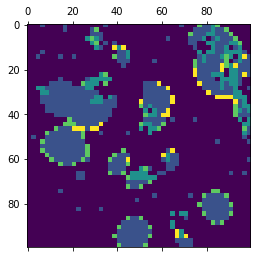

In [6]:
plt.matshow(data[160,150:250,270:370])

In [7]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:160,150:250,270:370],neighborhood,1,-1)

1
2
34

567
8


9
10
11
12
13
14
15
16
17
1819

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159


In [8]:
modelGGA = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=0,noChilds=10,noChromosomes=100)

In [9]:
modelGGA.run()

config saved at saves/Experiment1/06_02_20_20_39_07/config.json
iteration 1
goal = 1goal = 4
goal = 2goal = 3


goal 1 elapsed time: 1.2780029773712158
goal = 5
goal 2 elapsed time: 1.3189995288848877goal 3 elapsed time: 1.3139994144439697

goal 4 elapsed time: 1.4690024852752686
goal 5 elapsed time: 0.43199825286865234
iteration 2
goal = 1goal = 4
goal = 2
goal = 3

goal 4 elapsed time: 0.17599964141845703goal 1 elapsed time: 0.1829991340637207

goal = 5
goal 3 elapsed time: 0.20599889755249023
goal 2 elapsed time: 0.25299715995788574
goal 5 elapsed time: 0.0859978199005127
iteration 3
goal = 1goal = 4goal = 2


goal = 3
goal 1 elapsed time: 0.1829991340637207
goal = 5goal 2 elapsed time: 0.20800065994262695goal 3 elapsed time: 0.2089993953704834


goal 4 elapsed time: 0.22999930381774902
goal 5 elapsed time: 0.09599971771240234
iteration 4
goal = 1
goal = 4goal = 2goal = 3


goal 1 elapsed time: 0.10199785232543945
goal = 5
goal 2 elapsed time: 0.1880028247833252
goal 3 elapsed time:

In [10]:
caggamodel = CAModel(modelGGA.rules,neighborhood,1,-1)

In [11]:
modelOCAT = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [12]:
modelOCAT.train()

training for value 1
1785
1616
1604
1589
1508
1483
1478
1463
1433
1425
1417
1262
1212
1198
1195
1191
1189
1183
1171
1145
1111
1010
1000
995
971
971
962
902
897
891
881
863
859
857
854
852
844
837
788
763
756
750
747
746
741
729
719
710
681
674
661
659
655
644
636
632
628
627
625
619
606
542
531
526
514
503
495
491
488
487
486
481
466
464
446
442
432
427
427
423
419
419
417
414
411
408
404
396
395
389
387
387
385
372
369
369
367
361
356
349
339
336
333
332
331
331
330
328
327
325
323
321
319
319
319
319
319
316
311
310
307
305
305
302
301
300
297
296
294
293
284
278
275
274
273
270
270
267
266
263
263
260
260
258
257
256
255
255
251
249
248
248
248
248
247
247
246
246
246
245
243
241
241
241
240
237
237
237
236
235
235
234
234
231
226
226
225
225
224
222
222
222
222
221
221
221
221
219
217
215
215
215
215
215
214
213
211
210
209
209
209
209
209
209
208
208
208
208
208
208
208
203
203
203
202
202
202
201
200
197
197
197
197
193
193
193
193
193
192
191
189
189
189
189
187
187
186
186
184


[[1,
  [{(0, 3, '>='), (1, 2, '<'), (4, 2, '<'), (7, 2, '<'), (8, 3, '>=')},
   {(0, 2, '<'),
    (1, 2, '>='),
    (3, 4, '>='),
    (4, 2, '<'),
    (5, 1, '<'),
    (5, 3, '>=')},
   {(1, 5, '<'),
    (2, 4, '>='),
    (3, 5, '>='),
    (4, 2, '<'),
    (5, 1, '<'),
    (6, 3, '>=')},
   {(3, 1, '<'), (3, 2, '>='), (4, 2, '<'), (4, 4, '<'), (8, 1, '<')},
   {(0, 3, '<'), (1, 5, '>='), (4, 5, '<'), (6, 5, '>=')},
   {(0, 1, '>='), (3, 1, '<'), (4, 2, '<'), (8, 5, '<')},
   {(0, 4, '>='),
    (1, 2, '<'),
    (2, 2, '>='),
    (2, 3, '>='),
    (4, 2, '<'),
    (5, 1, '<'),
    (5, 2, '<'),
    (6, 5, '>='),
    (8, 2, '<'),
    (8, 5, '>=')},
   {(1, 1, '>='), (7, 2, '<')},
   {(1, 1, '<'),
    (4, 2, '<'),
    (5, 3, '<'),
    (5, 4, '>='),
    (6, 3, '>='),
    (7, 4, '>='),
    (8, 5, '<')},
   {(0, 4, '>='),
    (1, 1, '<'),
    (2, 2, '<'),
    (3, 4, '<'),
    (4, 2, '<'),
    (6, 5, '>='),
    (8, 2, '>=')},
   {(0, 2, '<'),
    (0, 5, '>='),
    (1, 1, '<'),
    (1, 2, '<'),


In [13]:
id = 300
count = {}
other = {}
for id in range(len(data)):
    for op in modelOCAT.rules2:
        if modelOCAT.rules2[op](data[id,:-1]) and op == data[id,-1]:
            if op not in count:
                count[op] = 0
            count[op] +=1
            break
        if modelOCAT.rules2[op](data[id,:-1]) and  op != data[id,-1]:
            if op not in other:
                other[op] = 0
            other[op] +=1
            break
count,other

({1: 858068, 2: 517237, 3: 62984, 4: 12554, 5: 11042},
 {1: 31787, 2: 28598, 4: 28833, 5: 12480, 3: 26417})

In [14]:
caocatmodel = CAModel(modelOCAT.rules2,neighborhood,1,-1)

In [15]:
data= np.load("data/data.npy")
data = data[:200,150:250,270:370]
data=np.array(data)

Testing:
state 1/200
state 2/200
state 3/200
state 4/200
state 5/200
state 6/200
state 7/200
state 8/200
state 9/200
state 10/200
state 11/200
state 12/200
state 13/200
state 14/200
state 15/200
state 16/200
state 17/200
state 18/200
state 19/200
state 20/200
state 21/200
state 22/200
state 23/200
state 24/200
state 25/200
state 26/200
state 27/200
state 28/200
state 29/200
state 30/200
state 31/200
state 32/200
state 33/200
state 34/200
state 35/200
state 36/200
state 37/200
state 38/200
state 39/200
state 40/200
state 41/200
state 42/200
state 43/200
state 44/200
state 45/200
state 46/200
state 47/200
state 48/200
state 49/200
state 50/200
state 51/200
state 52/200
state 53/200
state 54/200
state 55/200
state 56/200
state 57/200
state 58/200
state 59/200
state 60/200
state 61/200
state 62/200
state 63/200
state 64/200
state 65/200
state 66/200
state 67/200
state 68/200
state 69/200
state 70/200
state 71/200
state 72/200
state 73/200
state 74/200
state 75/200
state 76/200
state 77/200

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

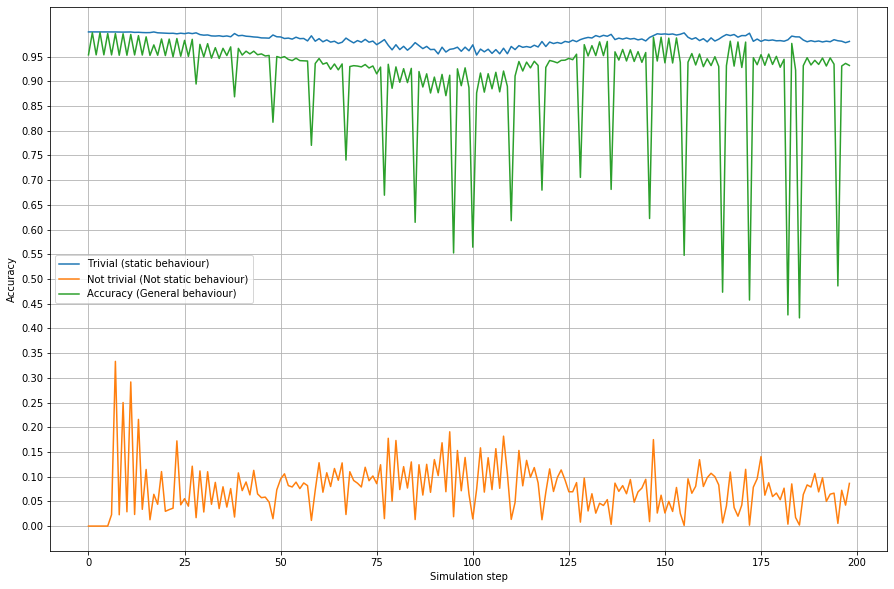

In [16]:
test1 = Testing1(data,caocatmodel,verbose=1)
test1.run()
test1.plot()

Testing:
state 1/200
state 2/200
state 3/200
state 4/200
state 5/200
state 6/200
state 7/200
state 8/200
state 9/200
state 10/200
state 11/200
state 12/200
state 13/200
state 14/200
state 15/200
state 16/200
state 17/200
state 18/200
state 19/200
state 20/200
state 21/200
state 22/200
state 23/200
state 24/200
state 25/200
state 26/200
state 27/200
state 28/200
state 29/200
state 30/200
state 31/200
state 32/200
state 33/200
state 34/200
state 35/200
state 36/200
state 37/200
state 38/200
state 39/200
state 40/200
state 41/200
state 42/200
state 43/200
state 44/200
state 45/200
state 46/200
state 47/200
state 48/200
state 49/200
state 50/200
state 51/200
state 52/200
state 53/200
state 54/200
state 55/200
state 56/200
state 57/200
state 58/200
state 59/200
state 60/200
state 61/200
state 62/200
state 63/200
state 64/200
state 65/200
state 66/200
state 67/200
state 68/200
state 69/200
state 70/200
state 71/200
state 72/200
state 73/200
state 74/200
state 75/200
state 76/200
state 77/200

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

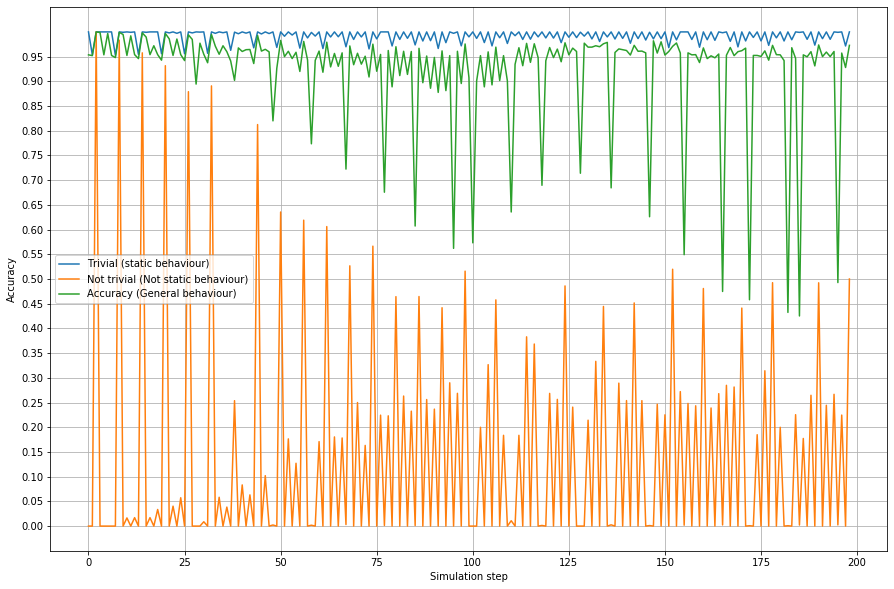

In [17]:
test2 = Testing1(data,caggamodel,verbose=1)
test2.run()
test2.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

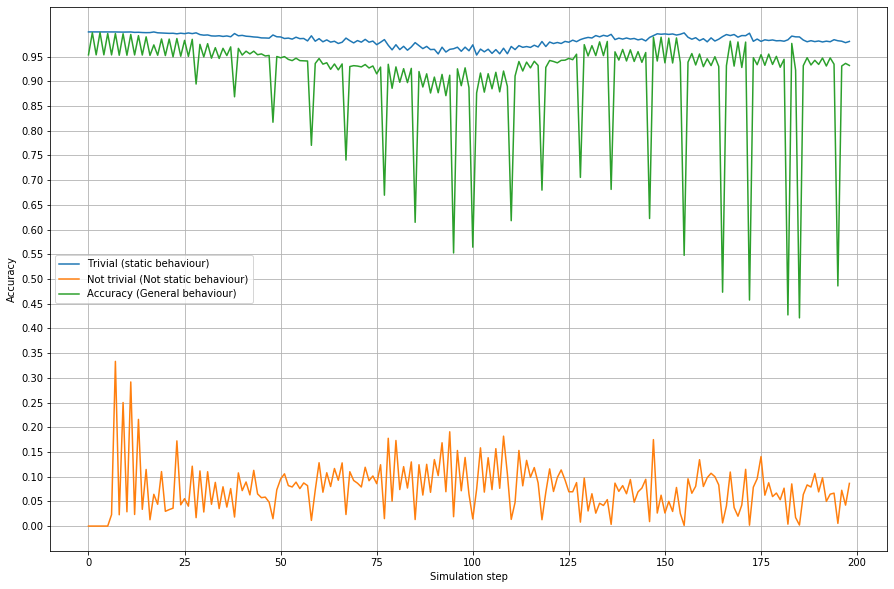

In [19]:
test1.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

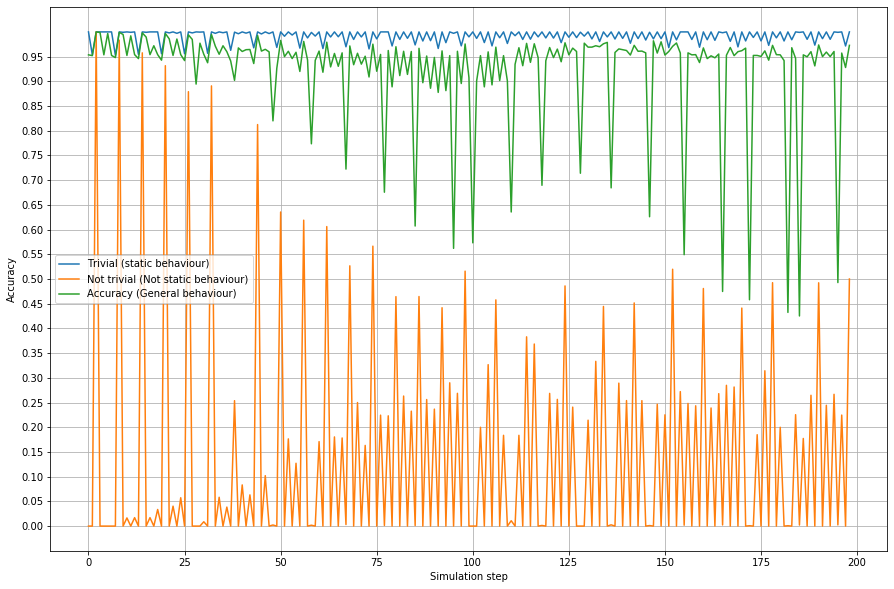

In [20]:
test2.plot()

In [21]:
results_path = f"{modelGGA.path}/{modelGGA.date}"
np.savetxt(f"{results_path}/ocat.csv",test1.result,delimiter=",",header="trivial,nontrivial,accuracy")
np.savetxt(f"{results_path}/gga.csv",test2.result,delimiter=",",header="trivial,nontrivial,accuracy")